<a href="https://colab.research.google.com/github/vedvkandge2000/Google-Colab/blob/master/Classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Some feature anlysis on data.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


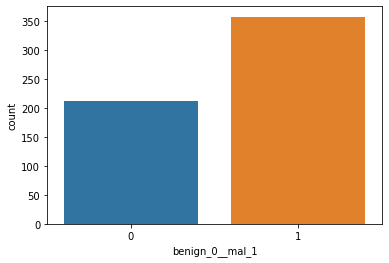

In [ ]:
sns.countplot(df['benign_0__mal_1'])
# Polting the count plot to know about the data which we want to predict.

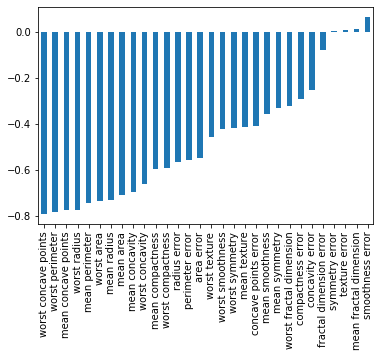

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
# This is coreletion plot
# That is reletion of feature which we want to predict to the other feature.

In [ ]:
# Spliting the data into training and test data.
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# fearture scaling the data.
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
# Building up the model.
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BIANARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Here we will see how to remove overfitting or how overfitting looks like.
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6661 - val_loss: 0.6430
Epoch 2/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6286 - val_loss: 0.6070
Epoch 3/600
426/426 [==============================] - 0s 106us/sample - loss: 0.5903 - val_loss: 0.5663
Epoch 4/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5438 - val_loss: 0.5133
Epoch 5/600
426/426 [==============================] - 0s 116us/sample - loss: 0.4937 - val_loss: 0.4608
Epoch 6/600
426/426 [==============================] - 0s 120us/sample - loss: 0.4434 - val_loss: 0.4117
Epoch 7/600
426/426 [==============================] - 0s 122us/sample - loss: 0.3995 - val_loss: 0.3671
Epoch 8/600
426/426 [==============================] - 0s 123us/sample - loss: 0.3579 - val_loss: 0.3284
Epoch 9/600
426/426 [==============================] - 0s 127us/sample - loss: 0.3223 - val_loss: 0.2946
Epoch 10/600

In [ ]:
losses = pd.DataFrame(model.history.history)

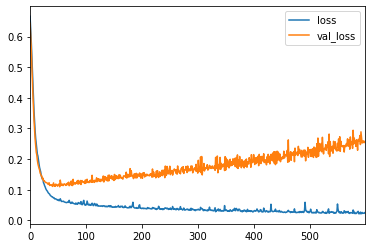

In [ ]:
losses.plot()
# From this we can see that up to certain point the training loss and validation loss both are decreasing but after a perticuler point 
# validation loss goes on increasing i.e model is overfitting.

# So we will use early stoping using tensflow and keras.

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BIANARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatically inferred
 |          from the name of the monitored quantity.
 |      baseline: Baseline value for the mo

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6893 - val_loss: 0.6717
Epoch 2/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6439 - val_loss: 0.6223
Epoch 3/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5939 - val_loss: 0.5759
Epoch 4/600
426/426 [==============================] - 0s 111us/sample - loss: 0.5473 - val_loss: 0.5302
Epoch 5/600
426/426 [==============================] - 0s 114us/sample - loss: 0.5045 - val_loss: 0.4848
Epoch 6/600
426/426 [==============================] - 0s 93us/sample - loss: 0.4597 - val_loss: 0.4400
Epoch 7/600
426/426 [==============================] - 0s 106us/sample - loss: 0.4177 - val_loss: 0.3950
Epoch 8/600
426/426 [==============================] - 0s 119us/sample - loss: 0.3757 - val_loss: 0.3545
Epoch 9/600
426/426 [==============================] - 0s 112us/sample - loss: 0.3385 - val_loss: 0.3184
Epoch 10/600

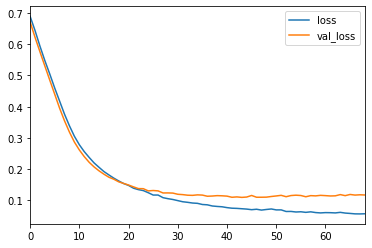

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# So now this is one method to stop overfitting another method is dropout layer.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BIANARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6650 - val_loss: 0.6601
Epoch 2/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6638 - val_loss: 0.6391
Epoch 3/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6275 - val_loss: 0.6180
Epoch 4/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6194 - val_loss: 0.6023
Epoch 5/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6109 - val_loss: 0.5833
Epoch 6/600
426/426 [==============================] - 0s 97us/sample - loss: 0.5974 - val_loss: 0.5675
Epoch 7/600
426/426 [==============================] - 0s 120us/sample - loss: 0.5623 - val_loss: 0.5462
Epoch 8/600
426/426 [==============================] - 0s 141us/sample - loss: 0.5750 - val_loss: 0.5226
Epoch 9/600
426/426 [==============================] - 0s 116us/sample - loss: 0.5423 - val_loss: 0.5014
Epoch 10/600

In [ ]:
model_loss = pd.DataFrame(model.history.history)

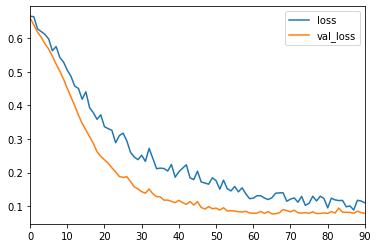

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('classification_model.h5')

In [ ]:
new_model = load_model('classification_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
new_data = df.drop('benign_0__mal_1',axis=1).iloc[0]

In [ ]:
new_data = new_data.values.reshape(-1,30)

In [ ]:
new_data = scalar.transform(new_data)

In [ ]:
new_model.predict_classes(new_data)

array([[0]], dtype=int32)